In [1]:
# Cell 1: Import necessary libraries and read data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Read data
csv_path = "Data/15min2024_consumption.csv"
data = pd.read_csv(csv_path, parse_dates=["Date"], thousands=',')
data = data.sort_values(by="Date")

In [3]:
# Calculate charger totals
chargers_total = data[["Chargers (L1) [kW]", "Chargers (L2) [kW]", "Chargers (L3) [kW]"]].sum(axis=1)
chargers_achteraan_total = data[["Chargers achteraan (L1) [kW]", "Chargers achteraan (L2) [kW]", "Chargers achteraan (L3) [kW]"]].sum(axis=1)
data["Total Chargers Combined"] = chargers_total + chargers_achteraan_total


In [4]:
# Cell 2: Display basic statistics
print("Basic Statistics of the Dataset:")
print(data.describe())

Basic Statistics of the Dataset:
                                Date  Grid Organi lbc (L1) [kW]  \
count                          13732               13732.000000   
mean   2024-10-21 11:54:49.994173952                7253.034445   
min              2024-08-11 00:00:00               -5042.000000   
25%              2024-09-15 18:11:15                3375.750000   
50%              2024-10-21 12:22:30                4537.500000   
75%              2024-11-26 05:33:45                7043.500000   
max              2024-12-31 23:45:00               47481.000000   
std                              NaN                8365.277221   

       Grid Organi lbc (L2) [kW]  Grid Organi lbc (L3) [kW]  \
count               13732.000000               13732.000000   
mean                 6876.032552                7246.064594   
min                 -4647.000000               -3824.000000   
25%                  3696.000000                4496.000000   
50%                  3961.000000                

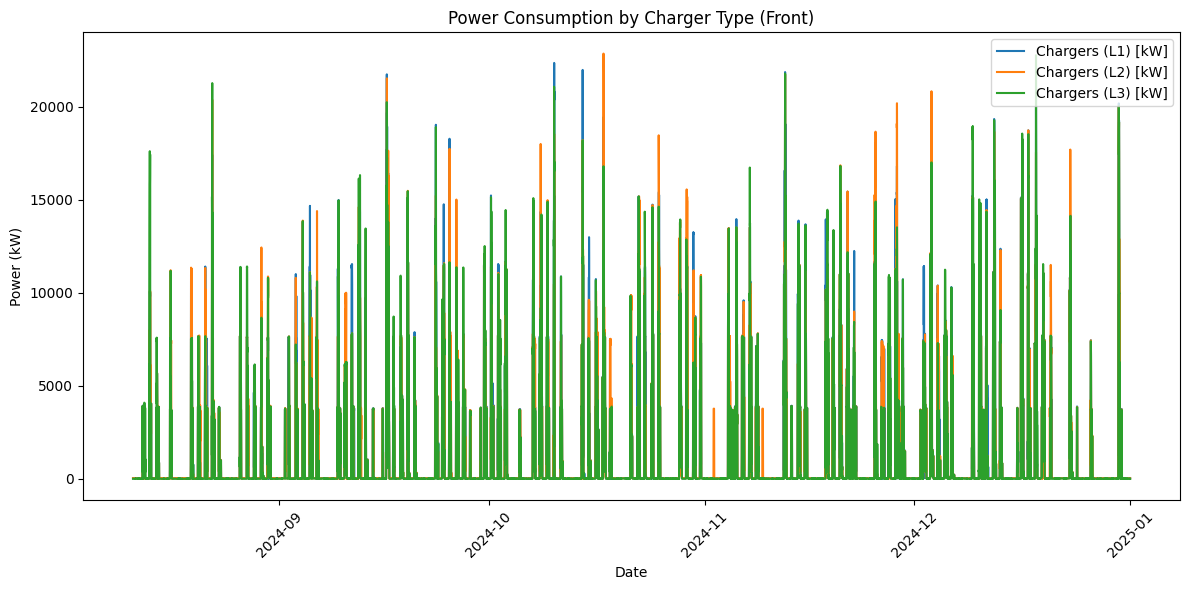

In [5]:
# Cell 3: Line plot with individual charger types
plt.figure(figsize=(12, 6))
for col in ["Chargers (L1) [kW]", "Chargers (L2) [kW]", "Chargers (L3) [kW]"]:
    plt.plot(data["Date"], data[col], label=col)
plt.title("Power Consumption by Charger Type (Front)")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

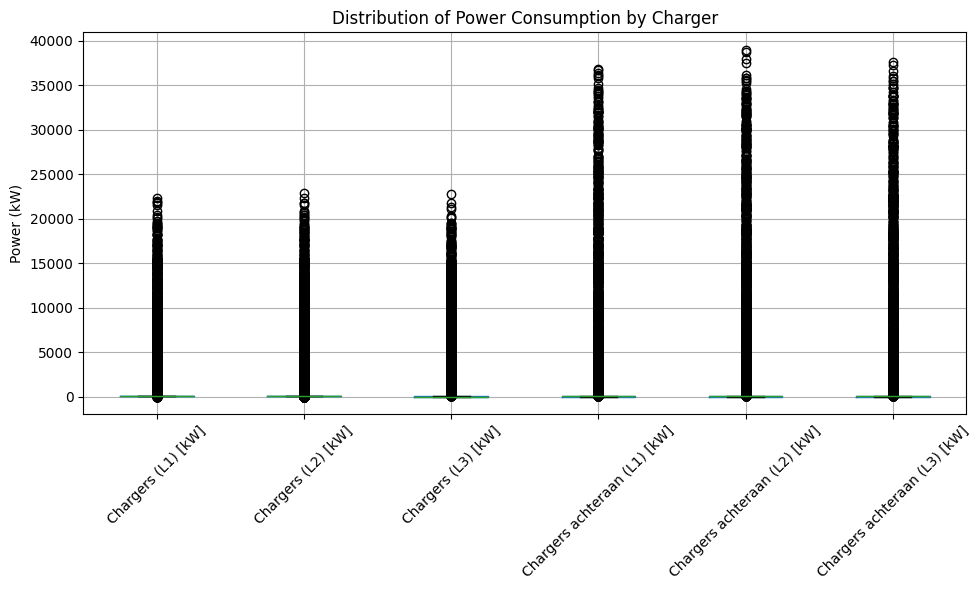

In [6]:
# Cell 4: Box plot of power consumption
plt.figure(figsize=(10, 6))
charger_cols = ["Chargers (L1) [kW]", "Chargers (L2) [kW]", "Chargers (L3) [kW]",
                "Chargers achteraan (L1) [kW]", "Chargers achteraan (L2) [kW]", "Chargers achteraan (L3) [kW]"]
data[charger_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Distribution of Power Consumption by Charger")
plt.ylabel("Power (kW)")
plt.tight_layout()
plt.show()

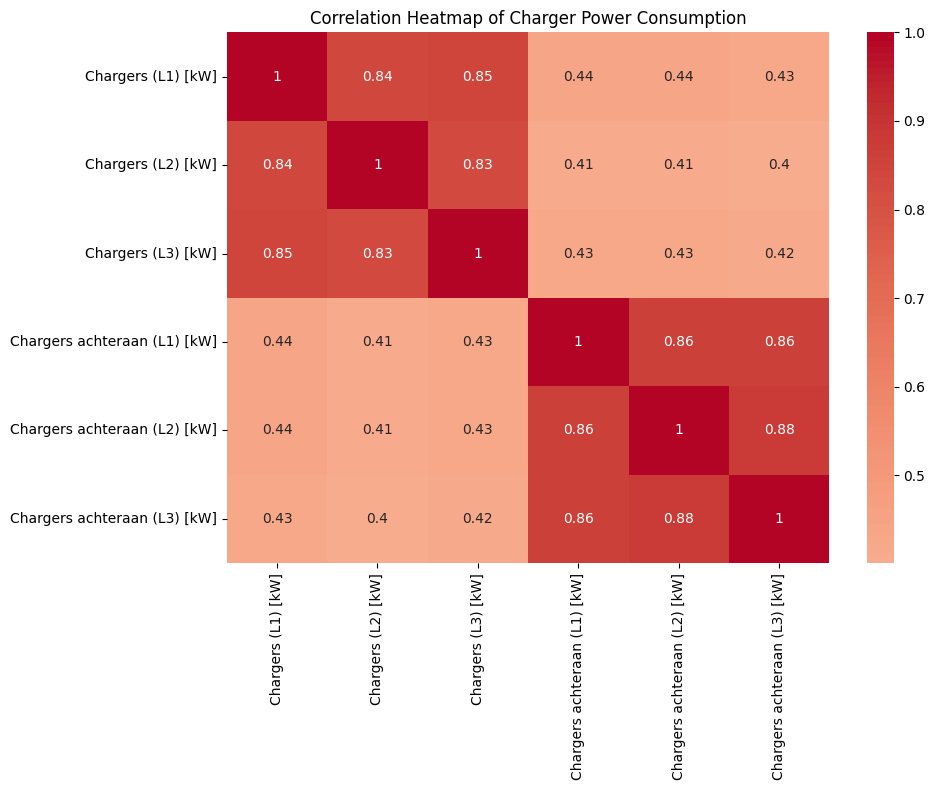

In [7]:
# Cell 5: Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = data[charger_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Charger Power Consumption")
plt.tight_layout()
plt.show()

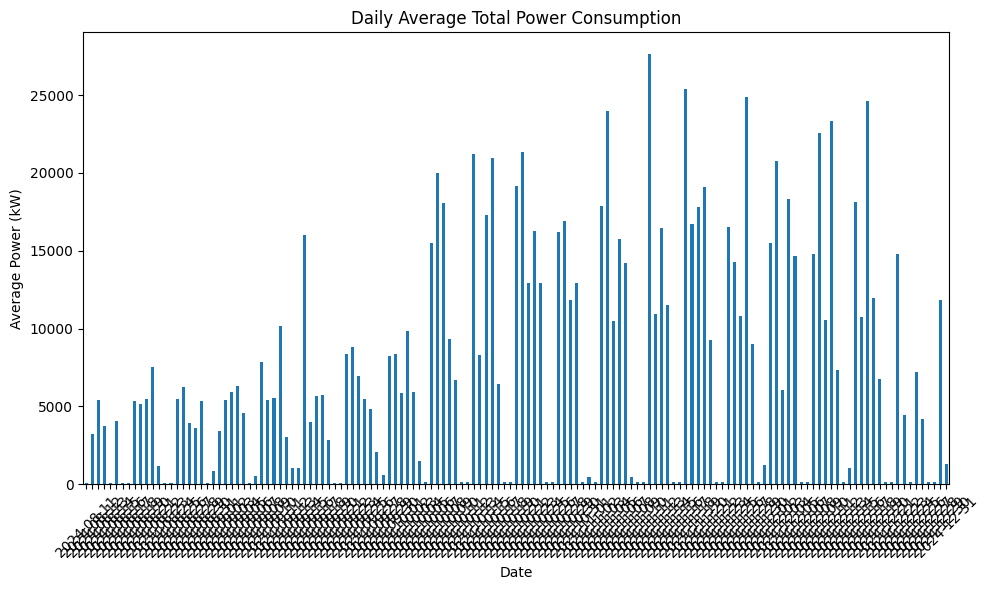

In [8]:
# Cell 6: Daily average consumption
daily_avg = data.groupby(data['Date'].dt.date)['Total Chargers Combined'].mean()
plt.figure(figsize=(10, 6))
daily_avg.plot(kind='bar')
plt.title("Daily Average Total Power Consumption")
plt.xlabel("Date")
plt.ylabel("Average Power (kW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

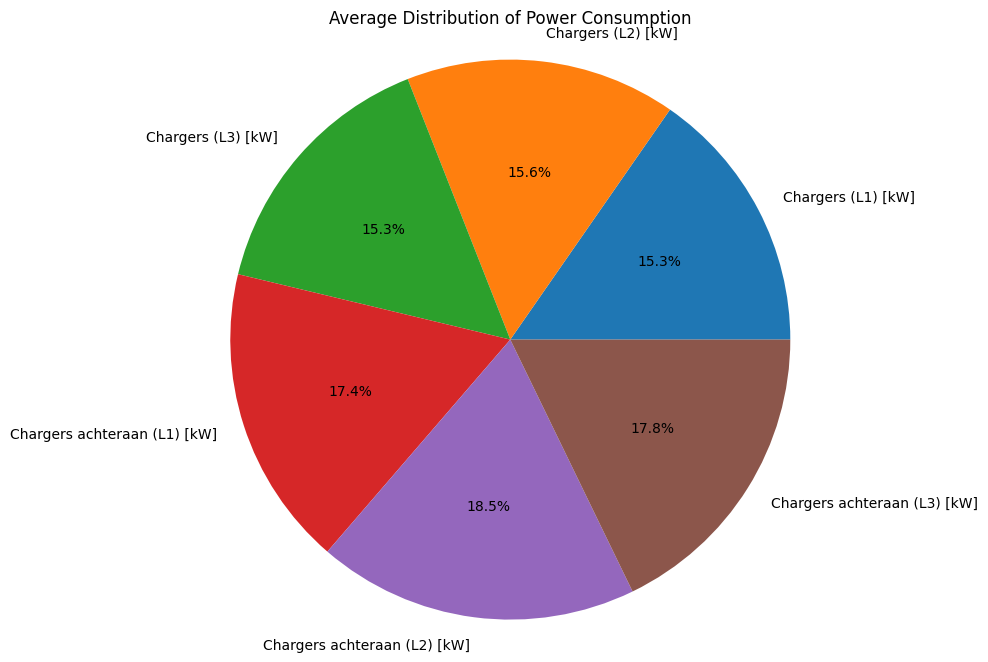

In [9]:
# Cell 7: Pie chart of average consumption distribution
avg_consumption = data[charger_cols].mean()
plt.figure(figsize=(10, 8))
plt.pie(avg_consumption, labels=avg_consumption.index, autopct='%1.1f%%')
plt.title("Average Distribution of Power Consumption")
plt.axis('equal')
plt.show()

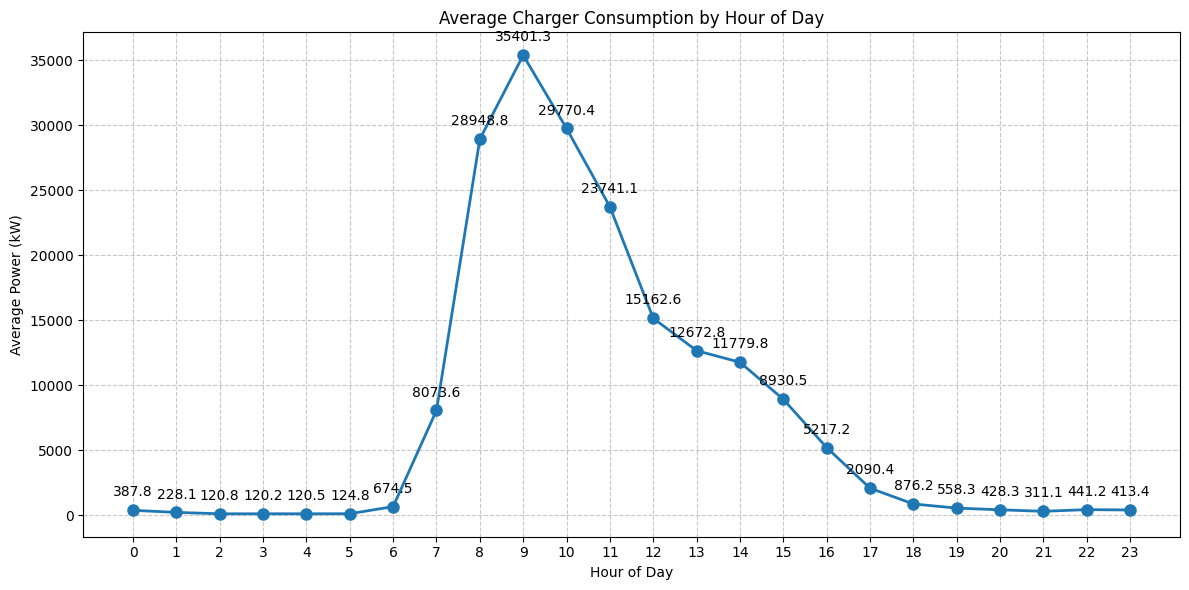


Hourly Average Consumption:
Date
0       387.75
1       228.14
2       120.77
3       120.17
4       120.47
5       124.82
6       674.50
7      8073.62
8     28948.78
9     35401.32
10    29770.36
11    23741.12
12    15162.60
13    12672.76
14    11779.78
15     8930.48
16     5217.23
17     2090.38
18      876.20
19      558.31
20      428.33
21      311.14
22      441.24
23      413.40
Name: Total Chargers Combined, dtype: float64


In [10]:
# Calculate hourly average of combined charger consumption
hourly_avg = data.groupby(data['Date'].dt.hour)['Total Chargers Combined'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=8)
plt.title('Average Charger Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power (kW)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))

# Add value labels on the points
for x, y in zip(hourly_avg.index, hourly_avg.values):
    plt.annotate(f'{y:.1f}', 
                (x, y), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.tight_layout()
plt.show()

# Print the numerical values
print("\nHourly Average Consumption:")
print(hourly_avg.round(2))

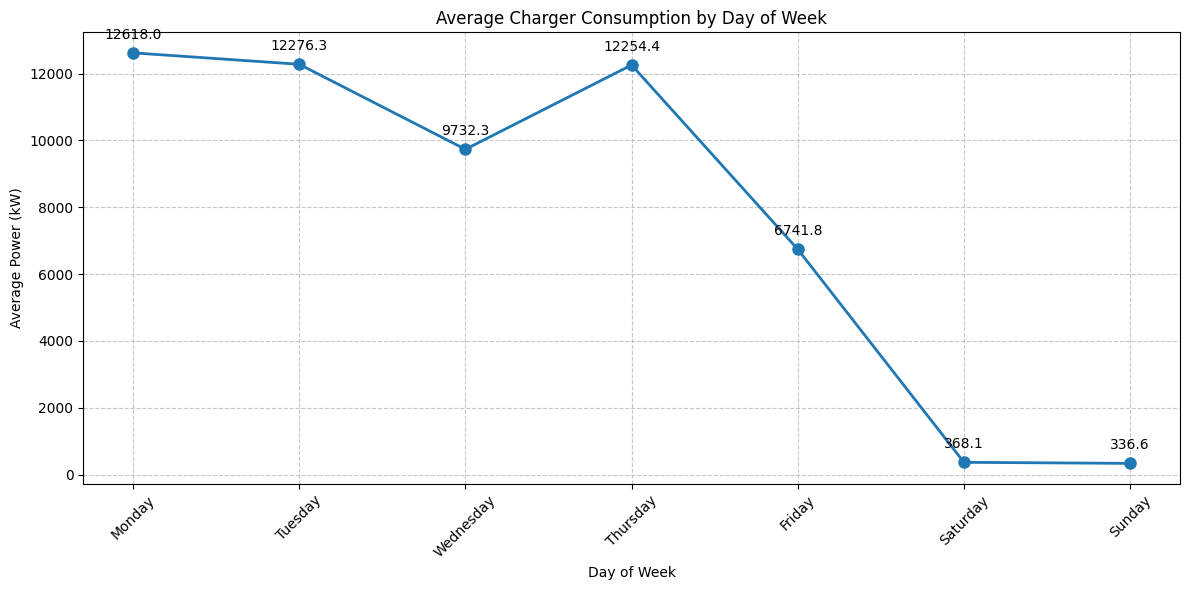


Daily Average Consumption:
Day_of_Week
Monday       12618.04
Tuesday      12276.27
Wednesday     9732.29
Thursday     12254.41
Friday        6741.84
Saturday       368.10
Sunday         336.63
Name: Total Chargers Combined, dtype: float64


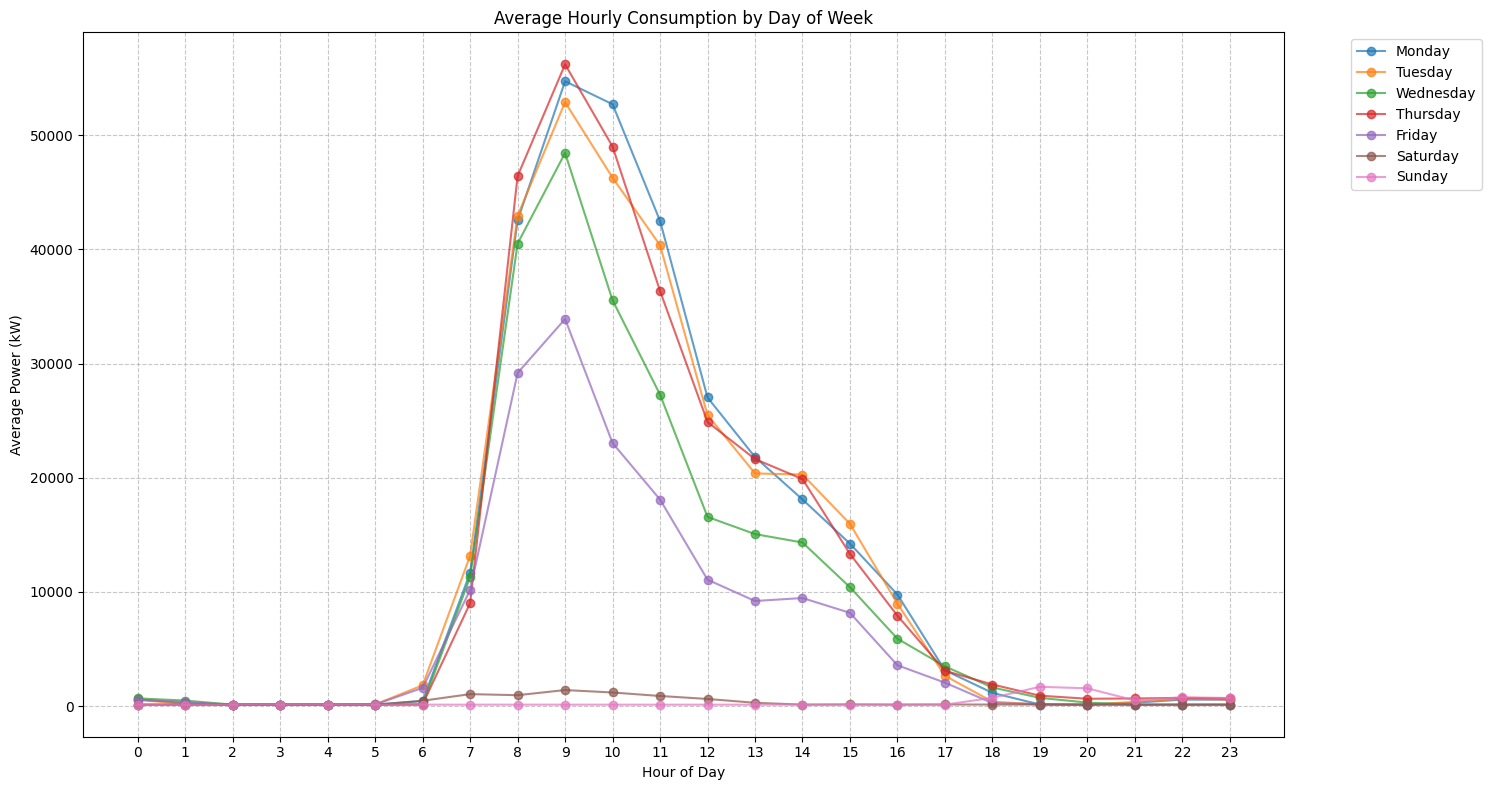

In [11]:
# Add day of week column and calculate average consumption by day
data['Day_of_Week'] = data['Date'].dt.day_name()
# Ensure days are in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = data.groupby('Day_of_Week')['Total Chargers Combined'].mean()
daily_avg = daily_avg.reindex(day_order)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg.values, marker='o', linewidth=2, markersize=8)
plt.title('Average Charger Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Power (kW)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on the points
for x, y in enumerate(daily_avg.values):
    plt.annotate(f'{y:.1f}', 
                (x, y), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.xticks(range(len(day_order)), day_order, rotation=45)
plt.tight_layout()
plt.show()

# Print the numerical values
print("\nDaily Average Consumption:")
print(daily_avg.round(2))

# Additional analysis: Show hourly patterns for each day of week
plt.figure(figsize=(15, 8))
for day in day_order:
    day_data = data[data['Day_of_Week'] == day]
    hourly_avg = day_data.groupby(day_data['Date'].dt.hour)['Total Chargers Combined'].mean()
    plt.plot(hourly_avg.index, hourly_avg.values, marker='o', label=day, alpha=0.7)

plt.title('Average Hourly Consumption by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power (kW)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [12]:
print(data.head())  # Check if data is loaded correctly
print(data.columns)  # Ensure 'Date' column exists


                     Date  Grid Organi lbc (L1) [kW]  \
13731 2024-08-11 00:00:00                        339   
13730 2024-08-11 00:15:00                       3259   
13729 2024-08-11 00:30:00                       3268   
13728 2024-08-11 00:45:00                       3393   
13727 2024-08-11 01:00:00                       3235   

       Grid Organi lbc (L2) [kW]  Grid Organi lbc (L3) [kW]  \
13731                       3877                       4673   
13730                       3895                        463   
13729                       3833                       4546   
13728                       3897                        461   
13727                       3825                       4552   

       Chargers (L1) [kW]  Chargers (L2) [kW]  Chargers (L3) [kW]  \
13731                  36                  34                   2   
13730                  36                  34                   2   
13729                  36                  32                   2   
13728   